
# EDA on the 2014 OSMI Survey Dataset

## 01 Basic Overview of the Dataset

In [56]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import seaborn as sns
import plotly.express as px

In [57]:
# Loading the dataset and overview
#datasets/2014_survey.csv
df = pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [58]:
# Attribute names
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

**Understanding the attributes**

The dataset contains the attributes which correspond to the following survey questions:
- ```Timestamp```
- ```Age```
- ```Gender```
- ```Country```
- ```state```: If you live in the United States, which state or territory do you live in?
- ```self_employed```: Are you self-employed?
- ```family_history```: Do you have a family history of mental illness?
- ```treatment```: Have you sought treatment for a mental health condition?
- ```work_interfere```: If you have a mental health condition, do you feel that it interferes with your work?
- ```no_employees```: How many employees does your company or organization have?
- ```remote_work```: Do you work remotely (outside of an office) at least 50% of the time?
- ```tech_company```: Is your employer primarily a tech company/organization?
- ```benefits```: Does your employer provide mental health benefits?
- ```care_options```: Do you know the options for mental health care your employer provides?
- ```wellness_program```: Has your employer ever discussed mental health as part of an employee wellness program?
- ```seek_help```: Does your employer provide resources to learn more about mental health issues and how to seek help?
- ```anonymity```: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- ```leave```: How easy is it for you to take medical leave for a mental health condition?
- ```mentalhealthconsequence```: Do you think that discussing a mental health issue with your employer would have negative consequences?
- ```physhealthconsequence```: Do you think that discussing a physical health issue with your employer would have negative consequences?
- ```coworkers```: Would you be willing to discuss a mental health issue with your coworkers?
- ```supervisor```: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- ```mentalhealthinterview```: Would you bring up a mental health issue with a potential employer in an interview?
- ```physhealthinterview```: Would you bring up a physical health issue with a potential employer in an interview?
- ```mentalvsphysical```: Do you feel that your employer takes mental health as seriously as physical health?
- ```obs_consequence```: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- ```comments```: Any additional notes or comments

In [59]:
# Basic properties of the dataset
print("Shape:", df.shape)
df.describe()

Shape: (1259, 27)


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [60]:
# View the properties of the attributes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [61]:
# Print all the columns with null values
print("Columns with null values:")
for col, i in zip(df.columns, df.isnull().sum()):
    if i != 0:
        print(col, ':', i)

Columns with null values:
state : 515
self_employed : 18
work_interfere : 264
comments : 1095


## 02 Overview Analysis
From a high vantage point of the dataset, we determine that it consists of 1259 records and 27 attributes. The `Age` attribute is the only integer typed one, with all others being objects. `comments` has the most number of `null` values, far outnumbering the other attributes with `null` values - `state`, `work_interference` and `self_employed`. 

**Inferences and Thoughts**
- It makes sense that few participants would contribute to additional commenting. 
- The lack of answers in `state` could be attributed to people outside the US. Further calculation regarding the number of people who did live in the US and yet did not provide an answer here would yield the true `null` values.
- How many participants were undecided on the question of whether their mental health condition interferes with their work?

## 03 Data Preprocessing

### 1. Dealing with missing values for certain attributes

### 2. Dealing with the `Age` attribute

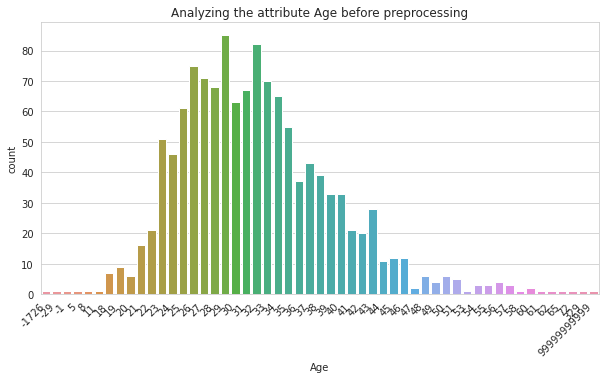

In [62]:
# Plot a histogram for the values of ages before preprocessing
plt.rcParams["figure.figsize"] = (10, 5)
age = sns.countplot(data=df, x='Age')
age.set_title('Analyzing the attribute Age before preprocessing')
age.set_xticklabels(age.get_xticklabels(), rotation=40, ha="right")
plt.xticks(rotation=45)
plt.show()

In [63]:
# Get the unique values of ages
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

As we can analyze from the graph and unique values, there exist negative values of ages. Values below 18 and above 80 make very little sense, so we'll replace the corresponding values with the median of the age column.

In [64]:
# How many dubious values of ages of each type do we have?
print("Responses with ages less than 18:")
print(df[df['Age'] < 18].Age)
print("\nResponses with ages more than 80:")
print(df[df['Age'] > 80].Age)
print("\nNull responses:", df['Age'].isnull().sum())

Responses with ages less than 18:
143      -29
715    -1726
734        5
989        8
1090      11
1127      -1
Name: Age, dtype: int64

Responses with ages more than 80:
364            329
390    99999999999
Name: Age, dtype: int64

Null responses: 0


In [65]:
# Replace values of ages less than 18 and more than 80 with the median

# Calculate previous median
median_without_dubious = df.loc[ (df['Age'] > 18) | (df['Age'] < 80), 'Age'].median()

# Replace dubious values with median
df.loc[ (df['Age'] < 18) | (df['Age'] > 80), 'Age'] = median_without_dubious

# Describe the attribute to analyze min and max
df['Age'].describe()

count    1259.000000
mean       32.069897
std         7.265565
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

The minimum and maximum ages are 18 and 71 with the mean at around 32. We seemed to have completed cleaning up Age.

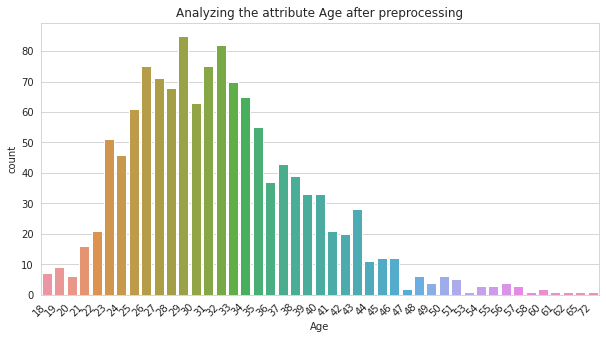

In [66]:
# Plot a histogram for the values of ages after preprocessing
plt.rcParams["figure.figsize"] = (10, 5)
age = sns.countplot(data=df, x='Age')
age.set_title('Analyzing the attribute Age after preprocessing')
age.set_xticklabels(age.get_xticklabels(), rotation=40, ha="right")
plt.xticks(rotation=45)
plt.show()

**Analysis**

The graph for the continuous Age attribute is a **positively skewed histogram**. Many people fall into the age 30 and 33 bins.

In [67]:
# Get the unique values of ages
print("Unique values:\n", df['Age'].unique())

Unique values:
 [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


### 3. Dealing with the `Gender` attribute

In [68]:
# Are there any null values?
df['Gender'].isnull().sum()

0

Since there are no null values, we can move on.

In [69]:
# What are the unique values in the Gender column?
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In the survey, this question was open-ended, and so the responses are strings that we need to classify into bins. We do so with three bins:
- Male
- Female
- Other

`A little about you` and `p` certainly do not belong here. We remove the records with those attribute values.

In [70]:
# Remove the records with those attribute values
df = df[~df['Gender'].isin(['A little about you', 'p'])]

In [71]:
# Replace the strings with the values of bins we require
# Group all related strings into bins

# Group into Male bin
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male','Man', 'cis male', 'Mail', 'Male-ish', 
                      'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make']
                     
                     , 'Male', inplace = True)

# Group into Female bin
df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female', 
                      'cis-female/femme', 'Femake', 'Female (cis)', 'woman'], 
                     
                     'Female', inplace = True)

# Group into Other bin
df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary','fluid', 'queer','Androgyne',
                      'Trans-female', 'male leaning androgynous', 'Agender', 'Nah', 'All', 
                      'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 
                      'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman'],
                     
                     'Other', inplace = True)

df['Gender'].describe()

count     1257
unique       3
top       Male
freq       991
Name: Gender, dtype: object

In [72]:
# Viewing the counts of each type
df['Gender'].value_counts()

Male      991
Female    247
Other      19
Name: Gender, dtype: int64

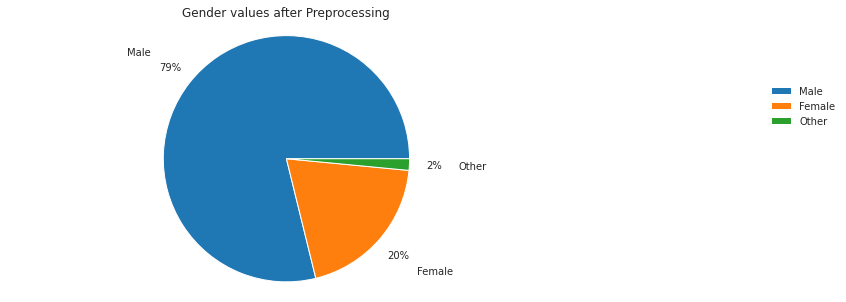

In [73]:
# Visualizing the proportion of genders
fig, ax = plt.subplots()
labels = ['Male', 
         'Female',
         'Other']
male_perc = (df['Gender'] == 'Male').sum() / df['Gender'].count()
female_perc = (df['Gender'] == 'Female').sum() / df['Gender'].count()
other_perc = (df['Gender'] == 'Other').sum() / df['Gender'].count()

percentages = [male_perc, female_perc, other_perc]

ax.pie(percentages, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Gender values after Preprocessing")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

As the plot suggests, male responders far outnumber the female and other responders. This is a point to keep in mind as we work on our models in the future.

### 4. Dealing with the `comments` attribute

Viewing comments after droping rows with missing values

In [74]:
for count, i in enumerate(df['comments'].dropna()):
    if count < 30:
        print(i[:80])

I'm not on my company's health insurance which could be part of the reason I ans
I have chronic low-level neurological issues that have mental health side effect
My company does provide healthcare but not to me as I'm on a fixed-term contract
Relatively new job. Ask again later
Sometimes I think  about using drugs for my mental health issues. If i use drugs
I selected my current employer based on its policies about self care and the qua
Our health plan has covered my psychotherapy and my antidepressant medication. M
I just started a new job last week hence a lot of don't know's
In addition to my own mental health issues I've known several coworkers that may
Thanks for doing this research.
In Russia we have mandatory medical insurance. Every employer must pay 3.6% of e
In my previous workplace which had mental health protections policies and access
I've seen negative consequences towards mental health conditions in previous wor
I'm not a permanent employee so do not get they benefits th

## 04 Data Visualization

### 1. Analysis of the `leave` attribute: Ease of taking leaves due to mental health issues

In [75]:
df['leave'].value_counts()

Don't know            563
Somewhat easy         266
Very easy             204
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In the plot below, the value counts for the column 'leave' are represented with a `countplot`.

Text(0.5, 0, 'Ease of taking leave')

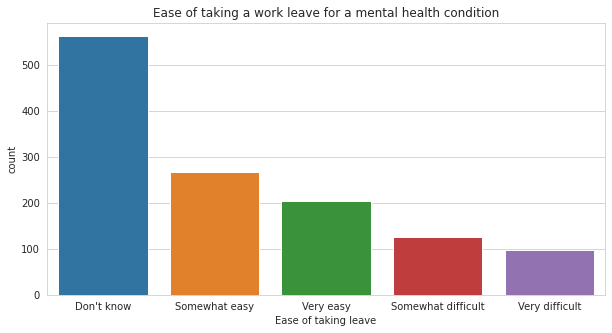

In [76]:
ax = sns.countplot(x='leave', data=df, order=df['leave'].value_counts().index)
ax.set_title('Ease of taking a work leave for a mental health condition')
ax.set_xlabel('Ease of taking leave')

###2.Analysis of treatment sought:People with family history of mental illness  grouped by treatment sought

In [77]:
temp_grp_df = df.groupby(['family_history','treatment']).count()
temp_grp_df.reset_index(drop=False, inplace=True)

fig = px.bar(temp_grp_df, 
             x='family_history', 
             y='Age', 
             labels={'Age':'Count'}, 
             orientation='v', 
             color='treatment',
             title='People with Family History of Mental Illness Grouped by Treatment Sought',
             barmode='group')
fig.show()

###3. Analysis of metal health consequence grouped by  physical health consequence 

In [78]:
temp_grp_df = df.groupby(['mental_health_consequence',
                          'phys_health_consequence',
                          'mental_vs_physical']).count()

temp_grp_df.reset_index(drop=False, inplace=True)

fig = px.bar(temp_grp_df, 
             x='mental_health_consequence', 
             y='Age', 
             labels={'Age':'Count'}, 
             orientation='v', 
             color='phys_health_consequence', 
             facet_col='mental_vs_physical',
             barmode='group')
fig.show()

###4. Analysis of `age` attribute grouped by gender

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Other     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

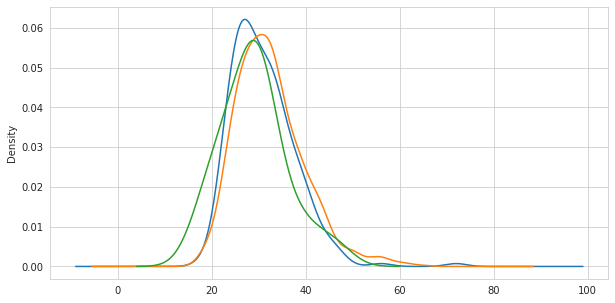

In [79]:
df.groupby('Gender').Age.plot(kind='kde')

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Other     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

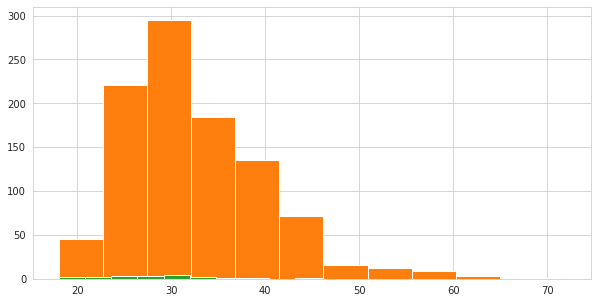

In [80]:
df.groupby('Gender').Age.hist()

- When the argument of color corresponds to non-numerical data(here yes/no), discrete colors are used.


###5. Analysis of `Country` attribute  is grouped by `treatment` and it is represented as a sector of the treemap.

In [81]:
temp_grp_df = df.groupby(['Country','treatment']).count()
temp_grp_df.reset_index(drop=False, inplace=True)

fig = px.treemap(temp_grp_df,path=['Country', 'treatment'],  color='treatment', values='Age',labels={'Age':'Count'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

TypeError: ignored

###6.Bar plot to view if the employee
####1.is `self employed` - Yes , No
####2.has a `family_history` of metal illness - Yes , No
####3.works primarily in a `tech_company`   - Yes , No
####4.thinks that discussing a `physical_health` issue with his/her employer would have negative consequences - Yes , Maybe , No
####5.Willing to share discuss metal health issue with their `supervisor` - Yes , No , Some of them

In [82]:
def bar_plot(categ_var):
    """
        input: variable ex: "anonymity"
        output: bar plot & value count
    """
    # get feature
    var = df[categ_var]
    # count number of categorical variable
    var_value = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.values)
    plt.ylabel("Frequency")
    plt.title(categ_var)
    plt.show()
    print(f"{categ_var}:\n{var_value}")

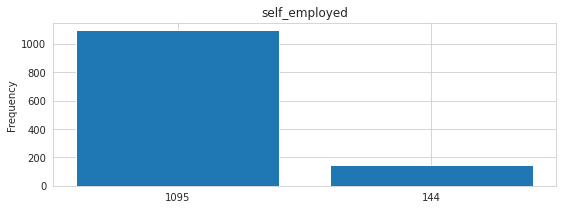

self_employed:
No     1095
Yes     144
Name: self_employed, dtype: int64


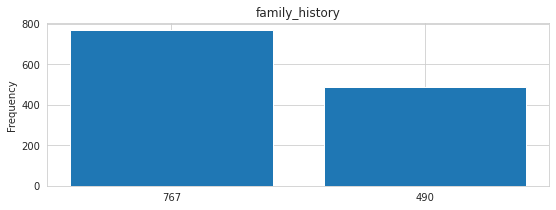

family_history:
No     767
Yes    490
Name: family_history, dtype: int64


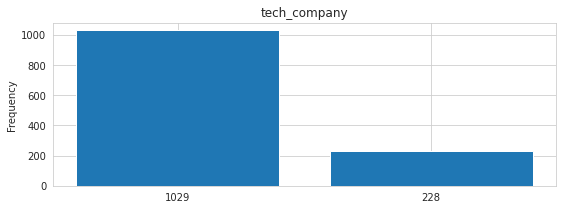

tech_company:
Yes    1029
No      228
Name: tech_company, dtype: int64


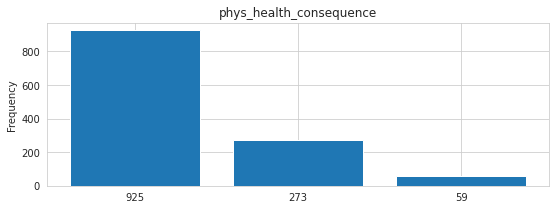

phys_health_consequence:
No       925
Maybe    273
Yes       59
Name: phys_health_consequence, dtype: int64


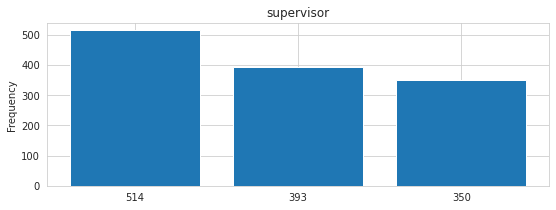

supervisor:
Yes             514
No              393
Some of them    350
Name: supervisor, dtype: int64


In [83]:
categorical_vars = ["self_employed","family_history","tech_company","phys_health_consequence","supervisor"]
for c in categorical_vars:
    bar_plot(c)

###7.Analysis of `Treatment` attribute:percentage of people who took treatment  for  mental health condition

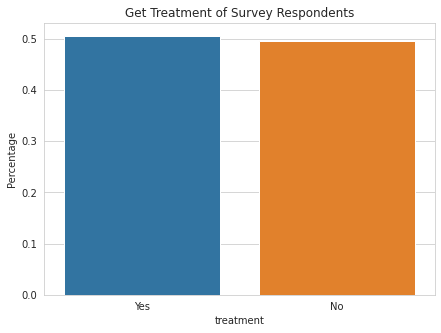

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Get Treatment of Survey Respondents')
plt.show()

###Difference in number of respondents that get treatment and no treatment(based of gender).

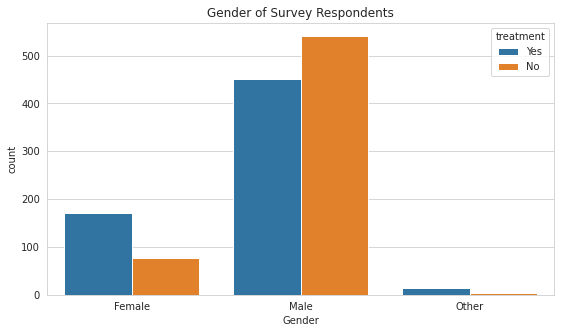

In [85]:
plt.figure(figsize = (20,5))
plt.title('Gender of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x=df['Gender'], hue = df['treatment'])
plt.title('Gender of Survey Respondents')
plt.show()

###8. Analysis of `country` attribute

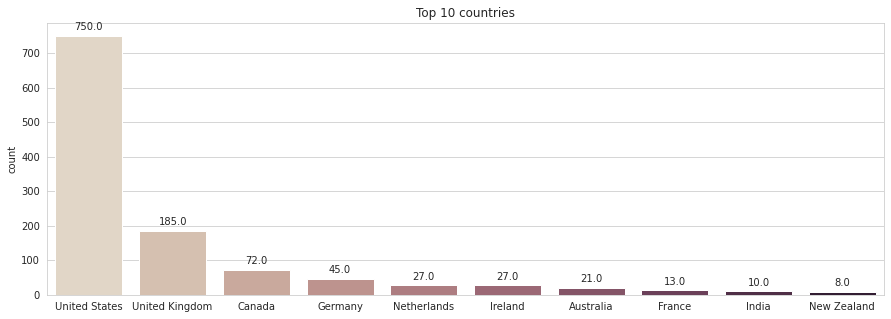

In [86]:
country_count = df.Country.value_counts().sort_values(ascending=False).to_frame()[:10]
country_count = country_count.rename(columns={'Country': 'count'})
plt.figure(figsize=(15,5))
ax = sns.barplot(x=country_count.index, y='count', data=country_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 countries')

###9. Analysis of `state` attribute 

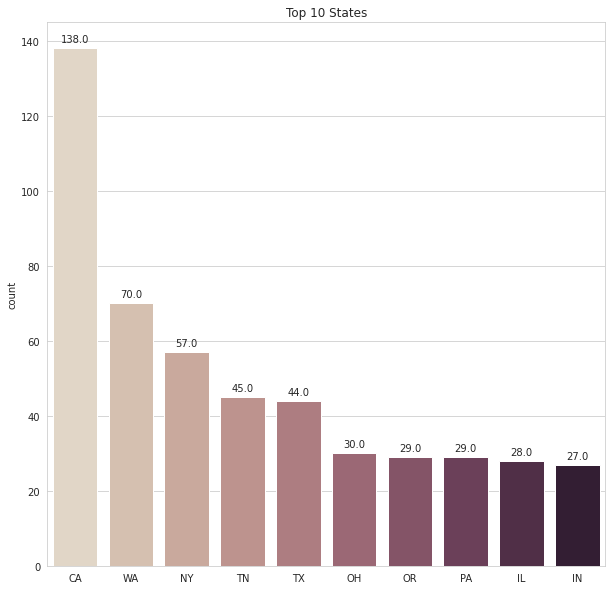

In [87]:
state_count = df.state.value_counts().sort_values(ascending=False).to_frame()[:10]
state_count = state_count.rename(columns={'state': 'count'})
plt.figure(figsize=(10,10))
ax = sns.barplot(x=state_count.index, y='count', data=state_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 States')

###10. Analysis of `no_of_employee` attribute

In [88]:
df['no_employees'].value_counts()


6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               160
500-1000           60
Name: no_employees, dtype: int64

###11. Analysis of `treatment` attribute:

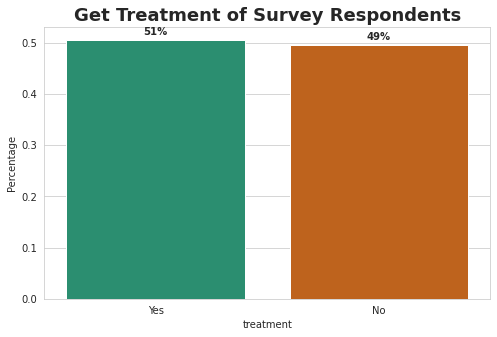

In [89]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')


###12. Analysis of `work_interfere` attribute:To view the frequency of respondents who admitted mental issues interfered with their work seek treatment



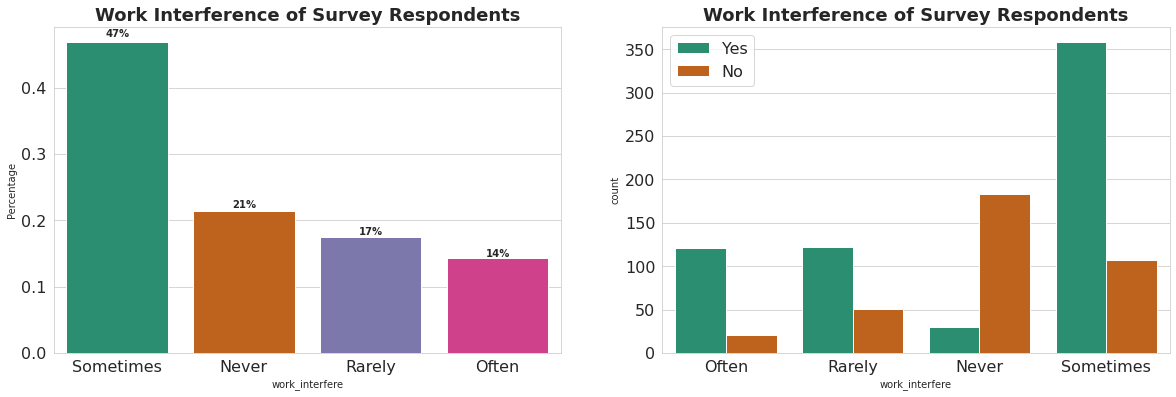

In [90]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['work_interfere'], hue = df['treatment'],  palette=dict(No = '#d95f02', Yes = '#1b9e77'))
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

###The responses included "Sometimes" with 47%, "Never" with 21%, "Rarely" with 17%, "Often" with 14%. Overall, we can see that about 65% of the responses admitted mental health issues interfered with their work sometimes, rarely, and often

###13. Analysis of `wellness_program` offered by companies

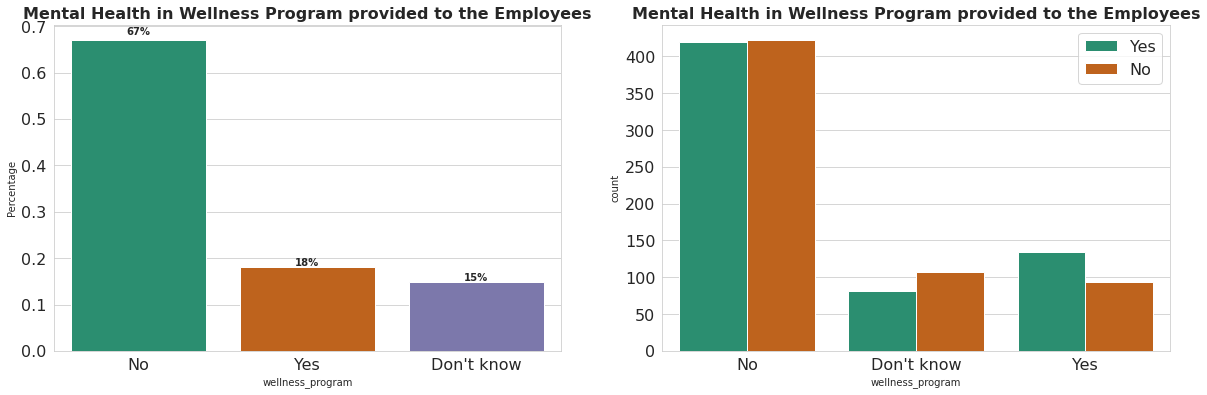

In [91]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['wellness_program'], hue = df['treatment'], palette='Dark2')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

###About 18% of the respondents said Yes to Mental Health is offered in their companies' wellness programs.However, it is concerned to see there are 67% of the respondents said that they aren't offered mental health as a part of their wellness programs provided by the companies.

##DATA PREPROCESSING

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1257 non-null   object
 1   Age                        1257 non-null   int64 
 2   Gender                     1257 non-null   object
 3   Country                    1257 non-null   object
 4   state                      742 non-null    object
 5   self_employed              1239 non-null   object
 6   family_history             1257 non-null   object
 7   treatment                  1257 non-null   object
 8   work_interfere             993 non-null    object
 9   no_employees               1257 non-null   object
 10  remote_work                1257 non-null   object
 11  tech_company               1257 non-null   object
 12  benefits                   1257 non-null   object
 13  care_options               1257 non-null   object
 14  wellness

In [93]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

We observe that columns state,self_employed,work_interfere,comments have null values.

We ignore the 

1.`Timestamp` column because it represents the time the employee took the questionnaire

2.`Country` and `State` because the employee belonging to the country and state is unevenly distributed

We also observe that the most of the comment section has null values

In [94]:
df.drop(columns=['Timestamp', 'Country', 'state'], inplace = True)

In [95]:
print(df['self_employed'].value_counts())
print(df['work_interfere'].value_counts())

No     1095
Yes     144
Name: self_employed, dtype: int64
Sometimes    465
Never        213
Rarely       173
Often        142
Name: work_interfere, dtype: int64


Since there are only few null values and majority of them are not employed we will change all NaN to No

In [96]:
df['self_employed'].fillna('No',inplace=True)
print(df['self_employed'].value_counts())

No     1113
Yes     144
Name: self_employed, dtype: int64


In [40]:
df['work_interfere'].fillna('Not sure',inplace=True)
print(df['work_interfere'].value_counts())

Sometimes    465
Not sure     264
Never        213
Rarely       173
Often        142
Name: work_interfere, dtype: int64


Since a lot of the entries in `work_interfere` is Nan we have introduced a new term **Not sure** and replace all the NaN with **Not sure**

In [111]:
df.drop(columns=['comments'], inplace = True)

About 70% of the `comments` column is empty hence we drop the comments section too

In [42]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [115]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [139]:
X = df.drop('treatment', axis =1)
Y = df.treatment

In [118]:
df.head(15)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0
5,33,1,0,1,0,3,4,0,1,2,1,1,0,0,0,1,1,2,2,1,0,0,0
6,35,0,0,1,1,3,0,1,1,1,0,1,1,1,1,0,0,1,0,1,1,0,0
7,39,1,0,0,0,0,0,1,1,1,2,1,1,2,0,1,1,0,0,1,1,1,0
8,42,0,0,1,1,3,1,0,1,2,2,1,1,1,3,0,1,2,2,1,0,1,0
9,23,1,0,0,0,0,2,0,1,0,0,0,0,0,0,1,1,2,2,0,0,2,0


##Viewing correlation between the columns by plotting covariance matrix

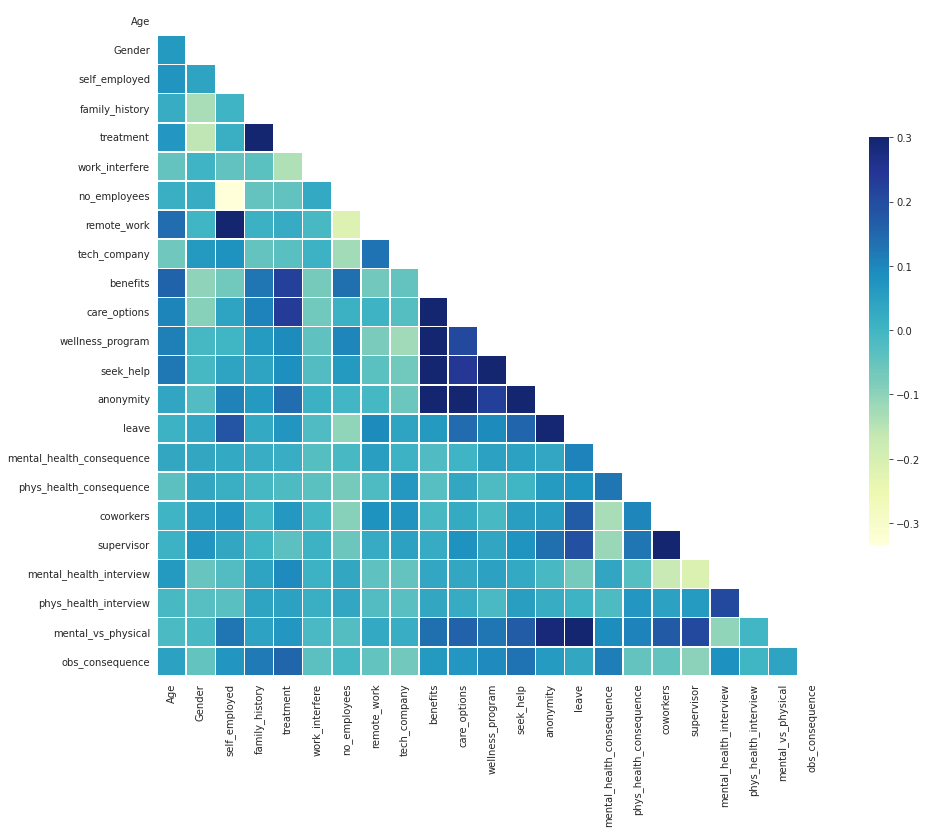

In [119]:
corr = df.corr(method ='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, vmax=.3,cmap="YlGnBu", center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [122]:
df['treatment'].value_counts()

1    635
0    622
Name: treatment, dtype: int64

##Splitting the data into training and test set

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25)#29

##Implementing Machine Learning Models

##1.Logistic Regression

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

print(pipe.score(X_test, y_test))
cross_val_score(pipe, X, Y, cv=10)

0.6952380952380952


array([0.65873016, 0.71428571, 0.8015873 , 0.6984127 , 0.76984127,
       0.67460317, 0.70634921, 0.712     , 0.672     , 0.712     ])

##2.K Nearest Neighbors classifier

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(),  KNeighborsClassifier(n_neighbors=3))
pipe.fit(X_train, y_train)  # apply scaling on training data
print(pipe.score(X_test, y_test))
cross_val_score(pipe, X, Y, cv=10)

0.6698412698412698


array([0.64285714, 0.63492063, 0.72222222, 0.72222222, 0.65079365,
       0.61111111, 0.64285714, 0.64      , 0.664     , 0.632     ])

##3.Decision Tree

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=10) )
pipe.fit(X_train, y_train)  # apply scaling on training data
print(pipe.score(X_test, y_test))
cross_val_score(pipe, X, Y, cv=10)


0.726984126984127


array([0.78571429, 0.78571429, 0.78571429, 0.73809524, 0.76190476,
       0.67460317, 0.73809524, 0.776     , 0.704     , 0.704     ])

##4.Random Forest Classifier

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(max_depth=2,random_state=10) )
pipe.fit(X_train, y_train)  # apply scaling on training data
print(pipe.score(X_test, y_test))
cross_val_score(pipe, X, Y, cv=10)



0.7904761904761904


array([0.76984127, 0.78571429, 0.80952381, 0.82539683, 0.76984127,
       0.74603175, 0.79365079, 0.752     , 0.704     , 0.768     ])

##5.GridSearch

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()

pipe = make_pipeline(StandardScaler(),GridSearchCV(svc, parameters))
pipe.fit(X_train, y_train)  # apply scaling on training data
print(pipe.score(X_test, y_test))
cross_val_score(pipe, X, Y, cv=10)

0.7333333333333333


array([0.69047619, 0.73015873, 0.78571429, 0.75396825, 0.77777778,
       0.73809524, 0.70634921, 0.744     , 0.704     , 0.696     ])

##Tunning